<a href="https://colab.research.google.com/github/bubugamer/demo/blob/master/quickstarts/Get_started_thinking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Use Gemini thinking

<a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Get_started_thinking.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" height=30/></a>

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) and [Gemini 2.5 Pro](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-pro-preview-06-05) are models that are trained to do a [thinking process](https://ai.google.dev/gemini-api/docs/thinking-mode) (or reasoning) before getting to a final answer. As a result,
those models are capable of stronger reasoning capabilities in its responses than previous models.

You'll see examples of those reasoning capabilities with [code understanding](#scrollTo=GAa7sCD7tuMW), [geometry](#scrollTo=ADiJV-fFyjRe) and [math](#scrollTo=EXPPWpt6ttJZ) problems.

As you will see, the model is exposing its thoughts so you can have a look at its reasoning and how it did reach its conclusions.

## Understanding the thinking models

[Gemini 2.5 models](https://ai.google.dev/gemini-api/docs/thinking) are optimized for complex tasks that need multiple rounds of strategyzing and iteratively solving.

[Gemini 2.5 Flash](https://ai.google.dev/gemini-api/docs/models#gemini-2.5-flash-preview-04-17) in particular, brings the flexibility of using `thinking_budget` - a parameter
that offers fine-grained control over the maximum number of tokens a model can generate while thinking. Alternatively, you can designate a precise token allowance for the
"thinking" stage through the adjusment of the `thinking_budget` parameter. This allowance can vary between 0 and 24576 tokens for 2.5 Flash.

For more information about all Gemini models, check the [documentation](https://ai.google.dev/gemini-api/docs/models/gemini) for extended information on each of them.

On this notebook all examples are using `Gemini 2.5 Pro` and `Gemini 2.5 Flash` with the new `thinking_budget` parameter. For more information about using the `thinking_budget` with the Gemini thinking model, check the [documentation](https://ai.google.dev/gemini-api/docs/thinking).

## Setup

This section install the SDK, set it up using your [API key](../quickstarts/Authentication.ipynb), imports the relevant libs, downloads the sample videos and upload them to Gemini.

Just collapse (click on the little arrow on the left of the title) and run this section if you want to jump straight to the examples (just don't forget to run it otherwise nothing will work).

### Install SDK

The new **[Google Gen AI SDK](https://ai.google.dev/gemini-api/docs/sdks)** provides programmatic access to Gemini models using both the [Google AI for Developers](https://ai.google.dev/gemini-api/docs) and [Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/overview) APIs. With a few exceptions, code that runs on one platform will run on both. This means that you can prototype an application using the Developer API and then migrate the application to Vertex AI without rewriting your code.

More details about this new SDK on the [documentation](https://ai.google.dev/gemini-api/docs/sdks) or in the [Getting started](../quickstarts/Get_started.ipynb) notebook.

In [1]:
%pip install -U -q "google-genai>=1.16.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 217.7/217.7 kB 6.4 MB/s eta 0:00:00


In [2]:
import google.generativeai

### Setup your API key

To run the following cell, your API key must be stored it in a Colab Secret named `GOOGLE_API_KEY`. If you don't already have an API key, or you're not sure how to create a Colab Secret, see [Authentication](https://github.com/google-gemini/cookbook/blob/178a971fa2b73f66caaf6cddf62a28522c79ca7f/quickstarts/Authentication.ipynb) for an example.

In [8]:
from google.colab import userdata

GOOGLE_API_KEY=userdata.get('colab')

### Initialize SDK client

With the new SDK you now only need to initialize a client with you API key (or OAuth if using [Vertex AI](https://cloud.google.com/vertex-ai)). The model is now set in each call.

In [9]:
from google import genai
from google.genai import types

client = genai.Client(api_key=GOOGLE_API_KEY)

In [10]:
MODEL_ID="gemini-2.5-flash-preview-05-20" # @param ["gemini-2.5-flash-preview-05-20", "gemini-2.5-pro-preview-06-05"] {"allow-input":true, isTemplate: true}

### Imports

In [42]:
import json
from PIL import Image
from IPython.display import display, Markdown

## Using the thinking models

Here are some quite complex examples of what Gemini thinking models can solve.

In each of them you can select different models to see how this new model compares to its predecesors.

In some cases, you'll still get the good answer from the other models, in that case, re-run it a couple of times and you'll see that Gemini thinking models are more consistent thanks to their thinking step.

### Using adaptive thinking

You can start by asking the model to explain a concept and see how it does reasoning before answering.

Starting with the adaptive `thinking_budget` - which is the default when you don't specify a budget - the model will dynamically adjust the budget based on the complexity of the request.


In [12]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    # config=types.GenerateContentConfig(
    # thinking_config=types.ThinkingConfig(
    #   thinking_budget=-1
    # ),
  # )
)

Markdown(response.text)

要参加成都GDG（Google Developer Groups 成都）社区活动，主要有以下几种途径：

1.  **通过 Meetup 平台（首选且最官方）**
    *   **GDG 的全球官方活动发布平台是 Meetup.com。** 成都GDG的活动信息通常会第一时间在这里发布。
    *   **操作步骤：**
        1.  访问 Meetup 网站：`www.meetup.com`
        2.  在搜索栏中输入 "GDG Chengdu" 或 "Google Developer Groups Chengdu"。
        3.  找到并加入 "Google Developer Groups Chengdu" 这个小组。
        4.  加入小组后，你会收到该小组发布的活动通知邮件或App推送。
        5.  在活动页面进行 RSVP (回复参加)，以便组织者统计人数。

2.  **关注成都GDG的微信公众号**
    *   在微信中搜索并关注“**成都GDG**”或“**GDG Chengdu**”的官方公众号。
    *   公众号会定期发布活动预告、活动回顾、技术文章等信息。这是在国内获取活动信息的重要渠道。

3.  **加入成都GDG的微信社群（推荐）**
    *   很多GDG社区会建立微信群，方便大家实时交流和获取活动信息。
    *   **如何加入：**
        *   通常在参加完一次线下活动后，组织者会在现场分享群聊二维码。
        *   你也可以关注成都GDG公众号后，在公众号内回复关键词（如“加群”）或联系公众号客服，咨询如何加入官方微信群。
        *   在群里可以第一时间了解活动信息、与社区成员交流、提问等。

4.  **关注其他相关技术社区或平台**
    *   有时GDG的活动也会在其他技术社区平台（如掘金、思否、CSDN、SegmentFault等）或与合作方的渠道上进行宣传。
    *   如果发现有相关合作的活动，也可以通过那些平台了解。

**参加活动的流程通常是：**

1.  **发现活动信息：** 通过 Meetup、微信公众号或微信群了解到活动。
2.  **注册/报名：** 根据活动页面的指引，在Meetup或其他报名链接上进行注册或报名，填写必要信息。有些活动可能需要提前抢票。
3.  **确认时间地点：** 确保你知道活动的具体时间、地点（线上会议链接或线下会场地址）。
4.  **准时参加：** 线上活动准时进入会议室；线下活动提前到达会场，通常需要签到。
5.  **积极参与：** 听讲座、参与讨论、提问、与同行交流，充分利用社区资源。

**小贴士：**

*   **尽早报名：** 许多活动场地有限，或有福利（如餐点、礼品），提前报名有助于组织者安排，也能确保你顺利参加。
*   **保持关注：** GDG的活动频率不固定，可能每周、每月或不定期举办，持续关注其发布渠道，以免错过。
*   **开放交流：** GDG社区非常欢迎新成员，不要害羞，主动与社区管理者、讲师和其他参会者交流，可以学到很多东西。

祝你参加活动愉快，并在成都GDG社区中有所收获！

Looking to the response metadata, you can see not only the amount of tokens on your input and the amount of tokens used for the response, but also the amount of tokens used for the thinking step - As you can see here, the model used around 1400 tokens in the thinking steps:

In [13]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: 1085
Output tokens: 743
Total tokens: 1840


### Disabling the thinking steps

You can also disable the thinking steps by setting the `thinking_budget` to 0. You'll see that in this case, the model doesn't think of the platipus as a possible answer.

**NOTE:** For now, you can disable the thinking steps when using the `gemini-2.5-flash-preview-05-20` model.

In [14]:
prompt = """
    如何参加成都GDG社区活动？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      thinking_budget=0
    )
  )
)

Markdown(response.text)

参加成都GDG社区活动有多种方式，主要取决于你希望参与的程度（旁听、志愿者、分享者等）。以下是一些主要的途径和步骤：

**1. 关注官方信息渠道（最重要）**

*   **微信公众号：** 这是成都GDG发布活动预告、报名链接、活动回顾最主要的平台。
    *   在微信中搜索并关注“**GDG Chengdu**”或“**成都GDG**”。
    *   确保开启公众号的消息通知，这样就不会错过新的活动推送。

*   **Meetup.com（可能）：** 一些GDG社区也会在国际性的活动平台Meetup.com上发布活动。虽然微信公众号是国内主流，但也可以关注一下：
    *   访问 [meetup.com](https://www.meetup.com/)，搜索“GDG Chengdu”或“Google Developer Group Chengdu”。

*   **B站（部分视频）：** 有时会将活动分享、技术讲解等视频上传到B站。
    *   在B站搜索“GDG Chengdu”可能找到相关账号或视频。

**2. 如何获取活动信息并报名**

*   **关注公众号推送：** 当有新的活动计划时，成都GDG公众号会发布详细的预告文章。文章中会包含：
    *   活动主题、时间、地点（线上/线下）
    *   议程安排、分享嘉宾
    *   **报名链接（通常是表单或小程序）**
    *   活动费用（GDG活动通常是免费的，但少数特殊活动可能有少量费用用于物料或餐饮）

*   **点击报名链接：** 按照预告文章中的指引，点击报名链接填写个人信息。
    *   通常需要提供姓名、联系方式（手机号、微信号）、邮箱等。
    *   有些活动可能需要你回答一些与技术背景相关的问题，以便组织者了解参会者构成。

*   **等待确认：** 报名成功后，部分活动可能会有短信或邮件确认。请留意接收。

**3. 参加活动（线上/线下）**

*   **线下活动：**
    *   **提前规划路线：** 确定活动地点，规划好交通路线。
    *   **准时到达：** 提前到达签到，领取参会证或物料（如果有）。
    *   **积极参与：** 听取分享、提问、与其他人交流。这是扩展人脉、学习新知识的好机会。
    *   **遵守会场规定：** 配合工作人员指引。

*   **线上活动：**
    *   **提前测试设备：** 确保网络、电脑/手机、耳机、摄像头（如果需要）都正常工作。
    *   **进入会议室：** 通常会提供会议链接（如腾讯会议、Zoom、B站直播等）。在活动开始前几分钟进入。
    *   **互动：** 利用聊天框提问，参与讨论。

**4. 更多参与方式（深度参与）**

*   **成为志愿者：** 如果你希望为社区贡献一份力量，可以在公众号或活动现场咨询是否招募志愿者。志愿者通常会在活动组织、现场协助等方面提供帮助。
*   **成为分享者（讲师）：** 如果你对某个技术领域有深入研究，并乐于分享，可以联系社区组织者，提交你的分享议题。这是一个展示自己、提升影响力的好机会。
*   **加入社区社群：** 参加活动后，通常会有机会加入社区的微信群。这是日常交流、获取最新信息、寻求帮助的好地方。
*   **提供场地支持：** 如果你或你所在的公司能提供合适的活动场地，也可以联系GDG组织者。

**总结步骤：**

1.  **关注“GDG Chengdu”微信公众号。**
2.  **留意公众号发布的活动预告。**
3.  **点击预告中的报名链接完成报名。**
4.  **按时参加活动（线上或线下）。**
5.  **积极互动，拓展人脉，学习新知。**
6.  **考虑更深入地参与社区建设（志愿者、分享者等）。**

祝你参与愉快，学有所获！

Now you can see that the response is faster as the model didn't perform any thinking step. Also you can see that no tokens were used for the thinking step:

In [15]:
print("Prompt tokens:",response.usage_metadata.prompt_token_count)
print("Thoughts tokens:",response.usage_metadata.thoughts_token_count)
print("Output tokens:",response.usage_metadata.candidates_token_count)
print("Total tokens:",response.usage_metadata.total_token_count)

Prompt tokens: 12
Thoughts tokens: None
Output tokens: 933
Total tokens: 945


Keep in mind that the largest the thinking budget is, the longest the model will spend time thinking, with means a longer computation time and a more expensive request.

### Solving brain teasers

Here's another brain teaser based on an image, this time it looks like a mathematical problem, but it cannot actually be solved mathematically. If you check the toughts of the model you'll see that it will realize it and come up with an out-of-the-box solution.

In this case, you are fixing a value to the `thinking_budget` so the model will use up to 24576 tokens for the thinking step.

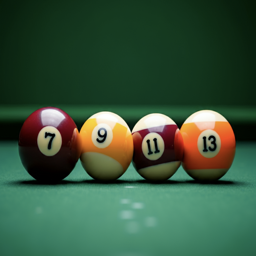

In [43]:
!wget https://storage.googleapis.com/generativeai-downloads/images/pool.png -O pool.png -q

im = Image.open("pool.png").resize((256,256))
im

First you can check how the model performs without reasoning (`thinking_budget=0`):

In [47]:
response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        "我如何用那三个台球加起来得到27？"
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=0
        )
    )
)

Markdown(response.text)

这张图片中有四个台球，它们上面的数字分别是 7、9、11 和 13。

如果你想用**其中三个台球**加起来得到27，你可以选择：

*   **7 + 9 + 11 = 27**

如果你想用**所有四个台球**加起来得到27，那是无法实现的，因为：

*   7 + 9 + 11 + 13 = 40

所以，答案是使用台球 7、9 和 11。

As you can notice, the model struggled to find a way to get to the result - and ended up suggesting to use different pool balls.

Now you can use the model reasoning to solve the riddle:

In [49]:
prompt = "我如何用那三个台球加起来得到31？"

thinking_budget = 24576 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=[
        im,
        prompt,
    ],
    config=types.GenerateContentConfig(
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget
        )
    )
)

Markdown(response.text)

您可以使用 **7、11 和 13** 这三个台球。

7 + 11 + 13 = 31

## Working thoughts summaries

Summaries of the model's thinking reveal its internal problem-solving pathway. Users can leverage this feature to check the model's strategy and remain informed during complex tasks.

For more details about Gemini 2.5 thinking capabilities, take a look at the [Gemini models thinking guide](https://googledevai.devsite.corp.google.com/gemini-api/docs/thinking#summaries).

In [22]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子。
住在红色房子里的人养了一只猫。
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

response = client.models.generate_content(
  model=MODEL_ID,
  contents=prompt,
  config=types.GenerateContentConfig(
    thinking_config=types.ThinkingConfig(
      include_thoughts=True
    )
  )
)

You can check both the thought summaries and the final model response:

In [24]:
for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

## **Thoughts summary:**

**Solving the House and Pet Puzzle**

My approach to this puzzle starts with understanding the core goal: figuring out who lives where and with which pet. First, I list out the key entities – Alice, Bob, and Carol; Red, Green, and Blue houses; and cat, dog, and an implied third pet (or no pet). A table helps to organize the information.

Next, I tackle the clues one by one, making deductions and updating the table. The first clue links the Red house to a cat, and the fifth clue clarifies that Alice *doesn't* have a cat. This means Alice can't be in the Red house. Since Bob doesn't live in the Green house, and because "Green is to the left of Red", it forces the house order: Green, Red, Blue. Bob's exclusion from Green, combined with the fact the Red house has a cat, means Bob *must* live in the Red house and own the cat! Also, Carol owns a dog.

Now, with Bob's placement sorted, Carol and Alice are left to find their places. Carol cannot live in Red (the cat lives there), so she must be in Green or Blue. This forces Alice into the remaining house. I initially considered if Carol's dog placement could be *Green*. If so, Alice *must* be in Blue with another pet, consistent with the puzzle.

Re-evaluating "鲍勃不住在绿色房子里" (Bob is not in the Green house), this clue is satisfied because Bob lives in Red. From that point, the *only* piece of information I could use to determine which house Alice or Carol lived in would be "卡罗尔养了一只狗". With Green house left, and Blue house left, there is no *single correct* resolution; Alice (Another pet), Carol (dog) is *the same* as Carol (dog), Alice (Another pet) in the opposite houses. 


## **Answer:**

我们来一步步地推导出答案：

1.  **住在红色房子里的人养了一只猫。** (Red house owner has a cat.)
2.  **卡罗尔养了一只狗。** (Carol has a dog.)
3.  **爱丽丝不养猫。** (Alice does not have a cat.)

    从以上三点可以推断：
    *   住在红色房子里的人养猫。
    *   爱丽丝不养猫，所以她不住在红色房子里。
    *   卡罗尔养狗，所以她也不住在红色房子里（因为红色房子主人养猫）。
    *   既然爱丽丝和卡罗尔都不住在红色房子里，那么 **鲍勃一定住在红色房子里，并且养了一只猫。**

4.  **鲍勃不住在绿色房子里。** (Bob does not live in the Green house.)
    *   这与我们推断出鲍勃住在红色房子里的结论相符。

5.  **绿色房子在红色房子的左边。** (The Green house is to the left of the Red house.)
    *   既然鲍勃住在红色房子里，那么绿色房子就在鲍勃家的左边。
    *   街上只有红、绿、蓝三所房子，如果绿色房子在红色房子的左边，那么蓝色房子就一定在红色房子的右边。
    *   所以房子的排列顺序是：**绿色房子 - 红色房子 - 蓝色房子**。

6.  现在我们知道：
    *   **红色房子：鲍勃，养猫**

7.  剩下的两个人是爱丽丝和卡罗尔，剩下的房子是绿色房子和蓝色房子。
    *   卡罗尔养狗。
    *   爱丽丝不养猫（那么她养狗吗？不能，因为卡罗尔养狗。所以爱丽丝养的是第三种宠物，或者没有明确说明的宠物）。通常这类谜题意味着第三个人有第三种独特的宠物，比如鱼。

    我们需要确定卡罗尔和爱丽丝分别住在绿色和蓝色房子里。基于现有线索，这有两种可能，但通常谜题只有唯一解。由于没有更多线索来区分，我们选择一个逻辑上一致的方案：

    *   **绿色房子：卡罗尔，养狗** (卡罗尔不在红色房子，可以住绿色或蓝色)
    *   **蓝色房子：爱丽丝，养另一种宠物（例如：鱼）** (爱丽丝不在红色房子，可以住绿色或蓝色，如果卡罗尔在绿色，那么爱丽丝在蓝色，且她不养猫，符合条件)

**最终答案：**

*   **绿色房子：卡罗尔，养了一只狗。**
*   **红色房子：鲍勃，养了一只猫。**
*   **蓝色房子：爱丽丝，养了另一种宠物（例如鱼，或未提及的宠物）。**

You can also use see the thought summaries in streaming experiences:

In [ ]:
prompt = """
  爱丽丝、鲍勃和卡罗尔各自住在同一条街上的不同房子里：分别是红色、绿色和蓝色的房子。
住在红色房子里的人养了一只猫。
鲍勃不住在绿色房子里。
卡罗尔养了一只狗。
绿色房子在红色房子的左边。
爱丽丝不养猫。
谁住在每个房子里，他们各自养了什么宠物？
"""

thoughts = ""
answer = ""

for chunk in client.models.generate_content_stream(
    model=MODEL_ID,
    contents=prompt,
    config=types.GenerateContentConfig(
      thinking_config=types.ThinkingConfig(
        include_thoughts=True
      )
    )
):
  for part in chunk.candidates[0].content.parts:
    if not part.text:
      continue
    elif part.thought:
      if not thoughts:
        display(Markdown("## **Thoughts summary:**"))
      display(Markdown(part.text.strip()))
      thoughts += part.text
    else:
      if not answer:
        display(Markdown("## **Answer:**"))
      display(Markdown(part.text.strip()))
      answer += part.text

## **Thoughts summary:**

**Exploring Possibilities**

I'm currently breaking down the puzzle into its core components: people, houses, and pets. My strategy is to map out the different possibilities for each variable, keeping in mind the constraints and clues. I'm focusing on how each piece interrelates with another; trying to develop a system, so the process doesn't get muddled.

**Mapping Relationships**

I'm now refining the table structure, factoring in the implications of each clue. The "No Pet" option is added to the pet category for completeness. I'm focusing on direct and indirect correlations between individuals, house colors, and pets. Bob's house color is either red or blue. By process of elimination and deductive reasoning, I will systematically narrow down the variables using each clue.

**Refining Deductions**

I'm now integrating the spatial clue with the pet and house assignments. I've deduced the house order, and I'm cross-referencing to eliminate impossible scenarios. I can determine who has which pet based on the clues. I'm focusing on Carol's dog, and mapping how this limits possibilities. I'm building a more precise table, ready to finalize the solutions.

**Analyzing Relationships**

I'm now incorporating new clues and deductive logic to finalize assignments. Based on spatial clues and pet ownership, I've narrowed down some key relationships: Bob has the cat. The houses are Blue-Green-Red. I'm focusing on Carol's house color to resolve the puzzle's last piece. I am meticulously confirming each assignment.

**Refining Solutions**

I've further analyzed the spatial clue and deduced the precise house order: Blue, Green, then Red. Bob lives in the red house, and Carol has a dog, which resolves the pet and house color assignments. Now, I'm focusing on Alice's house and pet to finalize the remaining unknowns and confirm that the solution aligns with all the clues. I'll meticulously cross-reference each piece of information to ensure consistency.

**Completing the Deductions**

I've finally pinpointed the precise assignments, focusing on resolving the last few unknowns. By combining all the clues, I've concluded that Alice lives in the Green house, Carol in the Blue house, and Bob in the Red house. Alice must have the bird. Carol has the Dog, Bob has the Cat. The spatial clue aligns perfectly: Blue, Green, Red. I have a coherent solution.

**Synthesizing Solutions**

I've integrated all the clues and built a complete solution. Alice lives in the Green house and Carol in the Blue house. Bob is in the Red house. Carol has the dog and Bob has the cat. Alice, by process of elimination, has the remaining pet which is the bird or has no pet. The houses are Blue-Green-Red from left to right, consistent with the spatial clues.

**Synthesizing Relationships**

I'm synthesizing all the clues into a cohesive model, deducing the houses and pets assigned. Blue, Green, Red represents the house colors. Based on Carol's dog, Bob's cat, Alice, by deduction, has the third pet, or no pet. This structure is used to ensure all criteria are met, and to confirm the final table.

**Synthesizing Relationships**

I'm now integrating Carol's dog, Bob's cat, and Alice's position to fully deduce the assignments. Using the refined spatial clue and deductive reasoning, the only logical conclusion is that Alice has no pet. I'm building a more precise table, ready to finalize the solution.

**Synthesizing Relationships**

I'm now integrating Carol's dog, Bob's cat, and Alice's position to fully deduce the assignments. Using the refined spatial clue and deductive reasoning, I've confirmed that Alice has no pet. I'm building a more precise table, ready to finalize the solution and verify it against all clues.

**Refining the Solution**

The spatial order is refined: Blue, Green, then Red. I've deduced the assignments: Alice in Green (no cat), Bob in Red (cat), and Carol in Blue (dog). Each clue is satisfied. Now, it's a matter of final confirmation.

## **Answer:**

这是一个逻辑谜题，我们来一步步

推导：

**已知条件：**
1.  住在红色房子里的人养了一只猫。
2.  鲍勃不住在绿色房子里。
3.  卡罗尔养了一只狗。
4.

绿色房子在红色房子的左边。（这意味着房子排列可能是 蓝色-绿色-红色）
5.  爱丽丝不养猫。

**推理过程：**

1.  **确定宠物的分配：**

*   根据条件3，卡罗尔养了一只狗。
    *   根据条件5，爱丽丝不养猫。
    *   那么，剩下的鲍勃就只能养猫了（因为只有猫和狗两种宠物被明确

提及，且分别由不同人拥有）。
    *   所以：鲍勃养猫，卡罗尔养狗，爱丽丝没有猫（且狗已经被卡罗尔养了，所以爱丽丝没有宠物，

或养了其他未提及的宠物，但通常这类谜题意味着她没有被提及的宠物）。

2.  **确定养猫的人住的房子：**
    *   根据条件1，住在红色房子里的人养

了一只猫。
    *   我们已经确定鲍勃养猫。
    *   所以，鲍勃住在红色房子里。

3.  **确定房子的位置关系及对应人物：**
    *

我们知道鲍勃住在红色房子。
    *   根据条件4，绿色房子在红色房子的左边。由于只有三栋房子（红、绿、蓝），这意味着房子的排列顺序是：蓝色 - 绿色 - 红色

。
    *   红色房子是鲍勃的。
    *   根据条件2，鲍勃不住在绿色房子里（与鲍勃住在红色房子相符）。
    *   剩下的爱丽丝和卡罗尔

分别住在绿色和蓝色房子。
    *   住在绿色房子里的人不能是鲍勃（因为鲍勃在红色房子）。
    *   爱丽丝不养猫，而养猫的人住在红色房子，所以爱丽丝不住

在红色房子。
    *   爱丽丝是剩下的人中，唯一能住在绿色房子里的人（因为卡罗尔养狗，没有直接关联到绿色房子，但爱丽丝不能养猫，而且绿色房子里

的人不是养猫的）。
    *   所以，爱丽丝住在绿色房子里。

4.  **确定最后一人和房子：**
    *   最后只剩下卡罗尔和蓝色房子。
    *   所以，

卡罗尔住在蓝色房子里。

**最终答案：**

*   **爱丽丝** 住在 **绿色房子** 里，她 **没有养猫** (也没有养狗)。
*   **鲍勃** 住在

**红色房子** 里，他养了一只 **猫**。
*   **卡罗尔** 住在 **蓝色房子** 里，她养了一只 **狗**。

## Working with Gemini thinking models and tools

Gemini thinking models are compatible with the tools and capabilities inherent to the Gemini ecosystem. This compatibility allows them to interface with external environments, execute computational code, or retrieve real-time data, subsequently incorporating such information into their analytical framework and concluding statements.

Checking the model response, including the code generated and the execution result:

### Thinking with search tool

Search grounding is a great way to improve the quality of the model responses by giving it the ability to search for the latest information using Google Search. Check the [dedicated guide](./Search_Grounding.ipynb) for more details on that feature.

In this case, you are using the adaptive thinking_budget so the model will dynamically adjust the budget based on the complexity of the request.

If you want to experiment with a fixed budget, you can set the `thinking_budget` to a specific value (e.g. `thinking_budget=4096`).

In [25]:
from google.genai.types import Tool, GenerateContentConfig, GoogleSearch

google_search_tool = Tool(google_search=GoogleSearch())

prompt = """
   上个月宣布的重大科学突破有哪些？运用你的批判性思维，只列出真正令人难以置信的内容，而非夸大其词的标题。
"""

thinking_budget = 4096 # @param {type:"slider", min:0, max:24576, step:1}

response = client.models.generate_content(
    model=MODEL_ID,
    contents=prompt,
    config=GenerateContentConfig(
        tools=[google_search_tool],
        thinking_config=types.ThinkingConfig(
            thinking_budget=thinking_budget,
            include_thoughts=True
        )
    )
)

Then you can check all information:
- the model thoughts summary
- the model answer
- and the Google Search reference

In [ ]:
from IPython.display import HTML, Markdown

for part in response.candidates[0].content.parts:
  if not part.text:
    continue
  elif part.thought:
    display(Markdown("## **Thoughts summary:**"))
    display(Markdown(part.text))
    print()
  else:
    display(Markdown("## **Answer:**"))
    display(Markdown(part.text))

display(Markdown("## **Google Search information:**"))
display(HTML(response.candidates[0].grounding_metadata.search_entry_point.rendered_content))

## **Thoughts summary:**

**Evaluating June's Discoveries**

I've initiated the search, focusing on "scientific breakthroughs June 2025," and initial results are pouring in. My approach emphasizes filtering for truly transformative findings, scrutinizing sources for reputable scientific backing, and avoiding incremental advances. I'm prioritizing breakthroughs that shift our understanding or advance technology significantly, rather than fleeting media sensations.




## **Answer:**

2025年6月，多个科学领域都取得了突破性进展，以下是一些真正令人瞩目的成就：

**医学与健康**
*   **癌症研究新机制**：研究人员发现了一种癌细胞获取能量并扩散的新机制，即癌细胞通过微观导管从附近的神经细胞中窃取线粒体。这一“能量盗窃”行为增强了癌细胞在转移过程中的抵抗力。这一发现为阻止癌症扩散提供了新的治疗靶点，因为转移是癌症最致命的方面。此外，另一项研究发现，肿瘤DNA可以在诊断前数年就在血液中检测到，这为在癌症最早期、最可治疗的阶段通过血液检测进行筛查带来了希望。
*   **心血管疾病基因编辑突破**：生物技术公司CRISPR Therapeutics公布了CTX310（一种体内CRISPR基因编辑疗法）用于治疗心血管疾病的I期临床试验的积极结果。这项首次人体试验显示，单次输注CTX310可导致甘油三酯和低密度脂蛋白（“坏”胆固醇）呈剂量依赖性下降，高剂量下甘油三酯和低密度脂蛋白分别下降高达82%和81%。同样重要的是，没有观察到严重不良反应。
*   **广谱抗蛇毒血清**：哥伦比亚大学的科学家团队成功开发出第一种广谱抗蛇毒血清，能够中和全球19种最致命蛇类的神经毒素。
*   **细胞内部运作的AI预测**：哥伦比亚大学的研究人员利用一种新的人工智能方法，可以准确预测任何人类细胞内基因的活动，从而揭示细胞的内部机制。这一系统有望彻底改变科学家理解从癌症到遗传疾病的方​​式。

**空间与天文学**
*   **詹姆斯·韦布空间望远镜直接成像新系外行星**：美国宇航局的詹姆斯·韦布空间望远镜（JWST）首次直接成像了一颗新的系外行星。天文学家利用韦布望远镜发现了一颗以前未知的气体巨星，其质量与土星相当，围绕着年轻恒星TWA-7在50天文单位的距离上运行。这颗被命名为TWA-7b的行星是直接成像到的最轻的行星（约0.3木星质量），发现它位于恒星碎片盘的缝隙中，这正是模型预测的位置，证明了行星的引力塑造了圆盘的结构。
*   **太阳南极的首次成像**：欧洲空间局（ESA）的太阳轨道器首次成功拍摄到太阳南极的图像。通过在黄道下方约17°飞行，太阳轨道器首次捕捉到我们恒星的极地区域图像，相关图像于6月公布。这些独特的视角对于理解太阳的磁发电机和11年周期至关重要，因为两极被认为是驱动磁场反转和太阳风流出的地方。
*   **月球上的射电天文学**：直觉机器公司（Intuitive Machines）的IM1或Adesius机器人月球着陆任务成功登陆月球，尽管由于着陆最后时刻的意外横向运动导致航天器倾斜了30度，但任务仍被认为是成功的。该任务搭载了美国宇航局的实验性射电望远镜Roosey’s-1，它没有受到倾斜的灾难性影响，标志着首次在月球上进行了射电天文学研究。

**人工智能与计算**
*   **并行光子计算芯片**：中国科学家展示了一种并行光子计算芯片，能够进行100次同步波长操作，该芯片使用了孤子微梳和马赫-曾德尔干涉仪阵列，标志着可扩展、基于光的AI硬件迈出了重要一步。

**生物学**
*   **新细胞器“半纺锤体”的发现**：在人类细胞中发现了一种以前未知的细胞器，被描述为半纺锤体。
*   **星形胶质细胞与记忆储存**：一项新研究表明，星形胶质细胞这种星形脑细胞除了清除细胞碎片和调节血流外，可能在脑部储存记忆方面也发挥关键作用。

**其他**
*   **超强激光脉冲的单次捕获**：科学家开发了一种名为RAVEN的突破性技术，可以在单次拍摄中捕获超强激光脉冲的完整复杂性，这在以前被认为是几乎不可能的。
*   **量子计算“魔术态”效率提升**：大阪大学的研究人员开发出一种更高效的方法来创建量子计算中的“魔术态”，大大简化、加快并降低了噪声。
*   **城市野生动物进化**：通过检查芝加哥一百多年来的花栗鼠和田鼠标本，研究人员发现这些啮齿动物的头骨发生了细微但显著的进化变化，似乎是为了响应城市环境。
*   **行星科学数据可视化新工具**：美国宇航局开发了一个新的开源、基于网络的TiTiler-CMR工具，使科学家能够快速、灵活、高效地生成地球科学数据可视化。

## **Google Search information:**

## Generate Images
Gemini can output images directly as part of a conversation:

好的，我会生成一张哪吒兴致勃勃地参加成都谷歌开发者社区（GDG）活动的图片。他可能穿着带有火焰纹样的现代T恤，与其他参与者互动，背景是带有GDG标志和一些成都地标元素的会场。



image/png


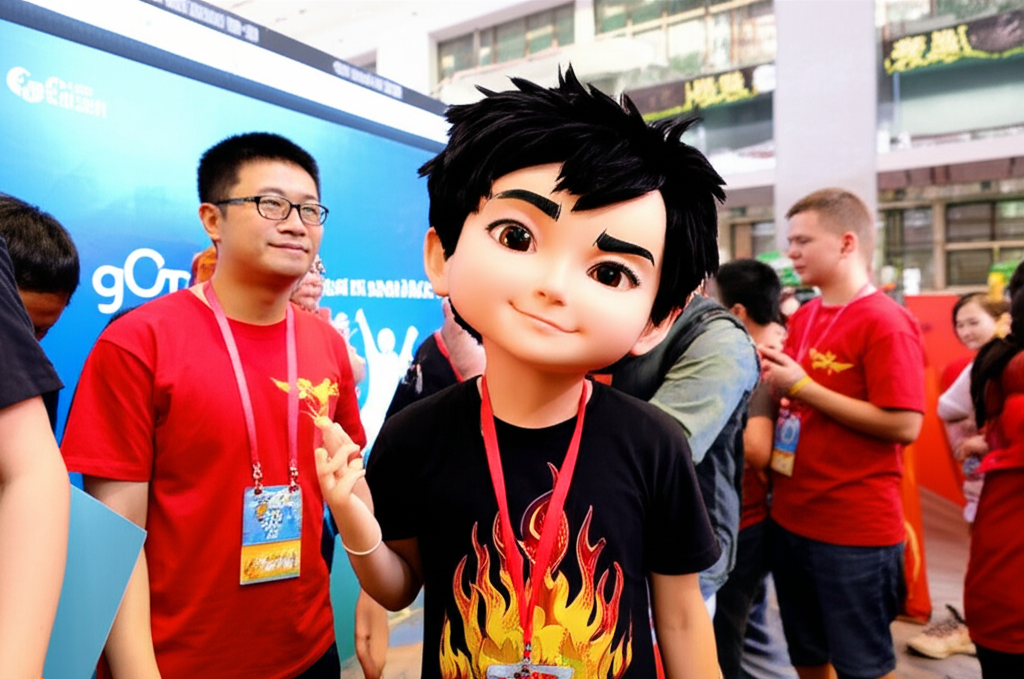

In [28]:

from IPython.display import Image, Markdown

response = client.models.generate_content(
    model="gemini-2.0-flash-preview-image-generation",
    contents='Hi, 生成一张哪吒参加成都GDG活动的图片',
    config=types.GenerateContentConfig(
        response_modalities=['Text', 'Image']
    )
)

for part in response.candidates[0].content.parts:
  if part.text is not None:
    display(Markdown(part.text))
  elif part.inline_data is not None:
    mime = part.inline_data.mime_type
    print(mime)
    data = part.inline_data.data
    display(Image(data=data))

## Start a multi-turn chat
The Gemini API enables you to have freeform conversations across multiple turns.

Next you'll set up a helpful coding assistant:

In [30]:
system_instruction = """
  你是一个猜字游戏机器人。请在1-100之间随机想一个数，我会尝试猜出这个数。每次我猜完后，请告诉我猜的数是太大、太小还是正确。如果我猜对了，请告诉我猜的次数并提议再玩一轮。
"""

chat_config = types.GenerateContentConfig(
    system_instruction=system_instruction,
)

chat = client.chats.create(
    model=MODEL_ID,
    config=chat_config,
)

In [31]:

response = chat.send_message("你好.")

Markdown(response.text)

你好！我已经想好了一个1到100之间的数字。

现在，轮到你来猜了。请告诉我你猜的第一个数字是什么？

In [39]:

response = chat.send_message("93")

Markdown(response.text)

恭喜你！你猜对了！我想的数字就是 **93**。

你总共猜了 8 次。

要不要再玩一轮呢？

In [ ]:

response = chat.send_message("75.")

Markdown(response.text)

你猜的数字是 **75**。

这个数字 **太小了**。

请继续猜！

In [ ]:

response = chat.send_message("87")

Markdown(response.text)

你猜的数字是 **87**。

这个数字 **太小了**。

请继续猜！

In [ ]:

response = chat.send_message("96.")

Markdown(response.text)

你猜的数字是 **96**。

这个数字 **太小了**。

请继续猜！

In [ ]:

response = chat.send_message("99.")

Markdown(response.text)

你猜的数字是 **99**。

恭喜你！**你猜对了！**

你一共猜了 6 次。

想再玩一轮吗？

# Next Steps

Try Gemini 2.5 Pro Experimental in
[Google AI Studio](https://aistudio.google.com/prompts/new_chat?model=gemini-2.5-pro-exp-03-25), and learn more about [Prompting for thinking models](https://ai.google.dev/gemini-api/docs/prompting-with-thinking).

For more examples of the Gemini capabilities, check the other [Cookbook examples](https://github.com/google-gemini/cookbook). You'll learn how to use the [Live API](./Get_started.ipynb), juggle with [multiple tools](../examples/LiveAPI_plotting_and_mapping.ipynb) or use Gemini [spatial understanding](./Spatial_understanding.ipynb) abilities.